In [2]:
%matplotlib inline
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
import scipy.stats as stats

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Populating the interactive namespace from numpy and matplotlib
Available exptdata keys:  ['1deg_c1', '025deg_c1', '01deg_c1', '1deg_c2', '025deg_c2', '01deg_c2', '1deg_c3', '025deg_c3', '01deg_c3']


In [3]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight", facecolor = 'w')  # comment out to disable saving
#     plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

### Function

In [4]:
def correlation():
    df1 = pd.DataFrame({'x':x1, 'y':y1})
    df2 = pd.DataFrame({'x':x2, 'y':y2})
    df3 = pd.DataFrame({'x':x3, 'y':y3})
    # print(df1.x.corr(df1.y))
    # print(df2.x.corr(df2.y))
    # print(df3.x.corr(df3.y))
    r1, p1=stats.pearsonr(df1.x,df1.y)
    r2, p2=stats.pearsonr(df2.x,df2.y)
    r3, p3=stats.pearsonr(df3.x,df3.y)
    a1.append(r1)
    a2.append(r2)
    a3.append(r3)
    b1.append(p1)
    b2.append(p2)
    b3.append(p3)

In [36]:
help(stats.pearsonr)

Help on function pearsonr in module scipy.stats._stats_py:

pearsonr(x, y)
    Pearson correlation coefficient and p-value for testing non-correlation.
    
    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets.  The calculation of the p-value relies on the
    assumption that each dataset is normally distributed.  (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)  Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    
    Parameters
    ----------
    x : (N,) array_like
        Input array.
    y : (N,) array_like
        Input array.
    
    Returns
    -------
    r : float
        Pearson's correlation coefficient.
    p-value : float
        Two-tailed p-value.
    
    Warns
    -----
    PearsonRConstantInputWarning
  

### Autucorrelation

In [4]:
dataset1 = pd.read_csv('4.1.0 Strait_trans/FE_trans(1).csv')
dataset2 = pd.read_csv('4.1.0 Strait_trans/AB_BC(1).csv')

X1 = dataset1.iloc[:, 1].values
X2 = dataset1.iloc[:, 2].values
X3 = dataset1.iloc[:, 3].values
Y1 = dataset2.iloc[:, 1].values
Y2 = dataset2.iloc[:, 2].values
Y3 = dataset2.iloc[:, 3].values


w = 1

x1 = np.convolve(X1, np.ones(w), 'valid') / w
x2 = np.convolve(X2, np.ones(w), 'valid') / w
x3 = np.convolve(X3, np.ones(w), 'valid') / w
y1 = np.convolve(Y1, np.ones(w), 'valid') / w
y2 = np.convolve(Y2, np.ones(w), 'valid') / w
y3 = np.convolve(Y3, np.ones(w), 'valid') / w

In [31]:
import statsmodels.api as sm

#calculate autocorrelations
sm.tsa.acf(x1,nlags=20)

array([ 1.        ,  0.48423146,  0.19478576,  0.17068023,  0.19854376,
        0.23242662,  0.19468743,  0.0375246 , -0.05928541,  0.04797243,
        0.17965348,  0.04174764,  0.06409383, -0.03541911, -0.03513284,
        0.07698868,  0.07970224,  0.08122251,  0.06977285, -0.10210195,
       -0.07981565])

In [32]:
sm.tsa.acf(x2,nlags=60).sum()

3.8059071538845846

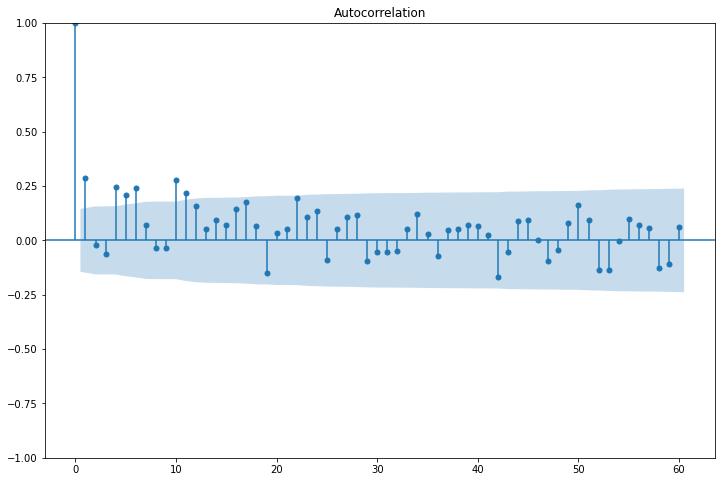

In [41]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

#plot autocorrelation function
fig = tsaplots.plot_acf(x2, lags=60,alpha = 0.05)
plt.show()

In [8]:
help(tsaplots.plot_acf)

Help on function plot_acf in module statsmodels.graphics.tsaplots:

plot_acf(x, ax=None, lags=None, *, alpha=0.05, use_vlines=True, adjusted=False, fft=False, missing='none', title='Autocorrelation', zero=True, auto_ylims=False, bartlett_confint=True, vlines_kwargs=None, **kwargs)
    Plot the autocorrelation function
    
    Plots lags on the horizontal and the correlations on vertical axis.
    
    Parameters
    ----------
    x : array_like
        Array of time-series values
    ax : AxesSubplot, optional
        If given, this subplot is used to plot in instead of a new figure being
        created.
    lags : {int, array_like}, optional
        An int or array of lag values, used on horizontal axis. Uses
        np.arange(lags) when lags is an int.  If not provided,
        ``lags=np.arange(len(corr))`` is used.
    alpha : scalar, optional
        If a number is given, the confidence intervals for the given level are
        returned. For instance if alpha=.05, 95 % confidenc

### 分段平均

In [5]:
def isplit_by_n(ls, n):
    for i in range(0, len(ls), n):
        yield ls[i:i+n]

def split_by_n(ls, n):
    return list(isplit_by_n(ls, n))

In [ ]:
dataset1 = pd.read_csv('4.1.0 Strait_trans/FE_trans(1).csv')
dataset2 = pd.read_csv('4.1.0 Strait_trans/AB_BC(1).csv')

j = 10

X1 = dataset1.iloc[:, 1].values
X2 = dataset1.iloc[:, 2].values
X3 = dataset1.iloc[:, 3].values
Y1 = dataset2.iloc[:, 1].values
Y2 = dataset2.iloc[:, 2].values
Y3 = dataset2.iloc[:, 3].values

x1 = split_by_n(X1,j)
x1 = [sum(x)/len(x) for x in x1]
x2 = split_by_n(X2,j)
x2 = [sum(x)/len(x) for x in x2]
x3 = split_by_n(X3,j)
x3 = [sum(x)/len(x) for x in x3]
y1 = split_by_n(Y1,j)
y1 = [sum(x)/len(x) for x in y1]
y2 = split_by_n(Y2,j)
y2 = [sum(x)/len(x) for x in y2]
y3 = split_by_n(Y3,j)
y3 = [sum(x)/len(x) for x in y3]

x1 = x1[:-1]
x2 = x2[:-1]
x3 = x3[:-1]
y1 = y1[:-1]
y2 = y2[:-1]
y3 = y3[:-1]
        
a1 = []
a2 = []
a3 = []
b1 = []
b2 = []
b3 = []

correlation()



for i in range(1,21):

    X1 = dataset1.iloc[:-i, 1].values
    X2 = dataset1.iloc[:-i, 2].values
    X3 = dataset1.iloc[:-i, 3].values
    Y1 = dataset2.iloc[i:, 1].values
    Y2 = dataset2.iloc[i:, 2].values
    Y3 = dataset2.iloc[i:, 3].values

    x1 = split_by_n(X1,j)
    x1 = [sum(x)/len(x) for x in x1]
    x2 = split_by_n(X2,j)
    x2 = [sum(x)/len(x) for x in x2]
    x3 = split_by_n(X3,j)
    x3 = [sum(x)/len(x) for x in x3]
    y1 = split_by_n(Y1,j)
    y1 = [sum(x)/len(x) for x in y1]
    y2 = split_by_n(Y2,j)
    y2 = [sum(x)/len(x) for x in y2]
    y3 = split_by_n(Y3,j)
    y3 = [sum(x)/len(x) for x in y3]
    
    if i != 3:
        x1 = x1[:-1]
        x2 = x2[:-1]
        x3 = x3[:-1]
        y1 = y1[:-1]
        y2 = y2[:-1]
        y3 = y3[:-1]

    correlation()
        
        
test1 = pd.DataFrame({'1deg':a1,'025deg':a2,'01deg':a3})

test1.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

print(test1)

round(test1,2).to_csv('6.2.11 correlation and lags/correlation and lags(' + str(j) + ').csv')



test2 = pd.DataFrame({'1deg':b1,'025deg':b2,'01deg':b3})

test2.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

print(test2)

round(test2,2).to_csv('6.2.11 p value and lags/p value and lags(' + str(j) + ').csv')

        1deg    025deg     01deg
0  -0.347337  0.522793 -0.239948
1  -0.338704  0.507961 -0.307133
2  -0.331741  0.502497 -0.316315
3  -0.318041  0.515920 -0.301477
4  -0.307976  0.527674 -0.274113
5  -0.294575  0.524368 -0.233502
6  -0.284784  0.491092 -0.220399
7  -0.300029  0.456233 -0.231847
8  -0.328938  0.395435 -0.307183
9  -0.387453  0.320121 -0.316517
10 -0.457658  0.244234 -0.333451
11 -0.493690  0.199771 -0.328026
12 -0.515035  0.175688 -0.317520
13 -0.532077  0.093153 -0.358621
14 -0.533748  0.104639 -0.381349
15 -0.541674  0.125819 -0.343313
16 -0.500254  0.138013 -0.301946
17 -0.482914  0.134204 -0.235661
18 -0.454272  0.156255 -0.114105
19 -0.411612  0.167562  0.007836
20 -0.378399  0.141260  0.097009
        1deg    025deg     01deg
0   0.157874  0.026011  0.337540
1   0.169169  0.031383  0.215070
2   0.178666  0.033565  0.200965
3   0.198383  0.028403  0.224072
4   0.229131  0.029484  0.287023
5   0.251073  0.030707  0.367067
6   0.267906  0.045305  0.395305
7   0.2419

### 连续平均

In [10]:
dataset1 = pd.read_csv('4.1.0 Strait_trans/FE_trans(1).csv')
dataset2 = pd.read_csv('4.1.0 Strait_trans/AB_BC(1).csv')

for j in range (2,11):
    
    X1 = dataset1.iloc[:, 1].values
    X2 = dataset1.iloc[:, 2].values
    X3 = dataset1.iloc[:, 3].values
    Y1 = dataset2.iloc[:, 1].values
    Y2 = dataset2.iloc[:, 2].values
    Y3 = dataset2.iloc[:, 3].values

    
    w = j
    
    x1 = np.convolve(X1, np.ones(w), 'valid') / w
    x2 = np.convolve(X2, np.ones(w), 'valid') / w
    x3 = np.convolve(X3, np.ones(w), 'valid') / w
    y1 = np.convolve(Y1, np.ones(w), 'valid') / w
    y2 = np.convolve(Y2, np.ones(w), 'valid') / w
    y3 = np.convolve(Y3, np.ones(w), 'valid') / w

    a1 = []
    a2 = []
    a3 = []
    b1 = []
    b2 = []
    b3 = []


    correlation()


    for i in range(1,21):

        X1 = dataset1.iloc[:-i, 1].values
        X2 = dataset1.iloc[:-i, 2].values
        X3 = dataset1.iloc[:-i, 3].values
        Y1 = dataset2.iloc[i:, 1].values
        Y2 = dataset2.iloc[i:, 2].values
        Y3 = dataset2.iloc[i:, 3].values

        x1 = np.convolve(X1, np.ones(w), 'valid') / w
        x2 = np.convolve(X2, np.ones(w), 'valid') / w
        x3 = np.convolve(X3, np.ones(w), 'valid') / w
        y1 = np.convolve(Y1, np.ones(w), 'valid') / w
        y2 = np.convolve(Y2, np.ones(w), 'valid') / w
        y3 = np.convolve(Y3, np.ones(w), 'valid') / w

        correlation()


    test1 = pd.DataFrame({'1deg':a1,'025deg':a2,'01deg':a3})

    test1.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

    print(test1)
    
    round(test1,2).to_csv('6.2.1 correlation and lags/correlation and lags(' + str(j) + ').csv')
    
    
    
    test2 = pd.DataFrame({'1deg':b1,'025deg':b2,'01deg':b3})

    test2.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

    print(test2)
    
    round(test2,2).to_csv('6.2.1 p value and lags/p value and lags(' + str(j) + ').csv')

        1deg    025deg     01deg
0  -0.218141  0.260025 -0.131371
1  -0.181792  0.319942 -0.097165
2  -0.125936  0.348185 -0.051845
3  -0.093263  0.283565 -0.061557
4  -0.092654  0.253735 -0.039462
5  -0.059374  0.349695  0.067082
6  -0.049025  0.390927  0.078330
7  -0.132196  0.260935 -0.081211
8  -0.226312  0.128546 -0.167600
9  -0.251709  0.121113 -0.094472
10 -0.275609  0.116692 -0.071614
11 -0.339719  0.058713 -0.169778
12 -0.391121 -0.004123 -0.275602
13 -0.434605 -0.065371 -0.335027
14 -0.417982 -0.056601 -0.363330
15 -0.323648  0.044135 -0.312125
16 -0.228159  0.131963 -0.161195
17 -0.168384  0.137746 -0.026378
18 -0.154859  0.097281 -0.014199
19 -0.157534  0.116871  0.028094
20 -0.151367  0.142404  0.160804
            1deg        025deg     01deg
0   3.093296e-03  3.927077e-04  0.077102
1   1.431518e-02  1.130811e-05  0.193174
2   9.207433e-02  1.671378e-06  0.489447
3   2.143343e-01  1.198091e-04  0.413026
4   2.186594e-01  6.319866e-04  0.600982
5   4.324478e-01  1.833845e-

### Plot

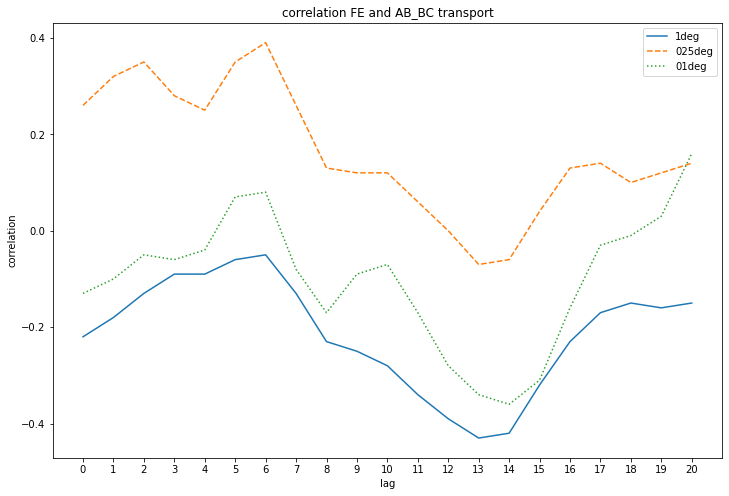

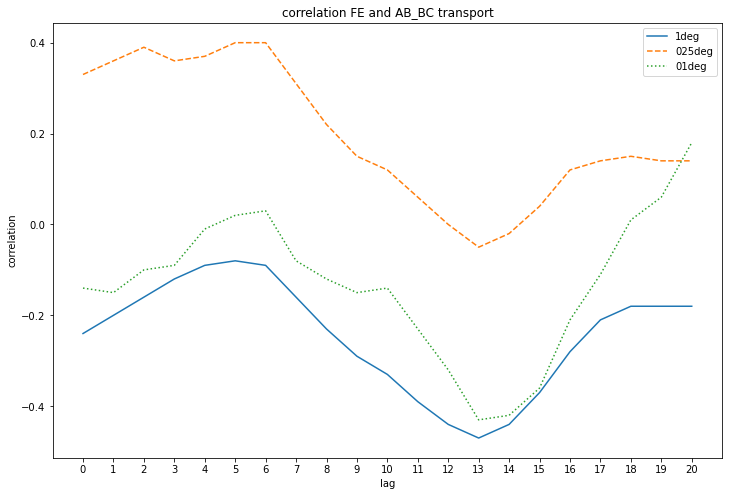

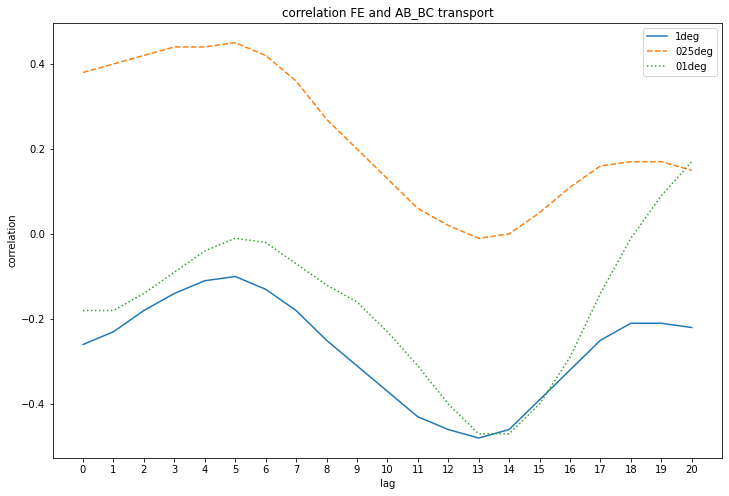

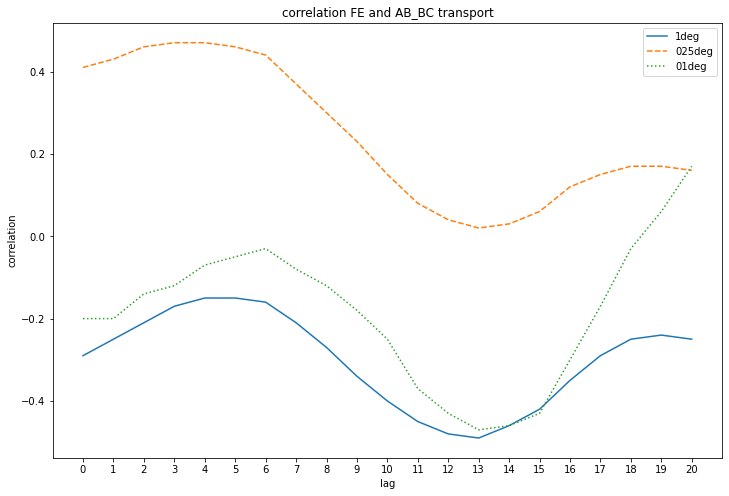

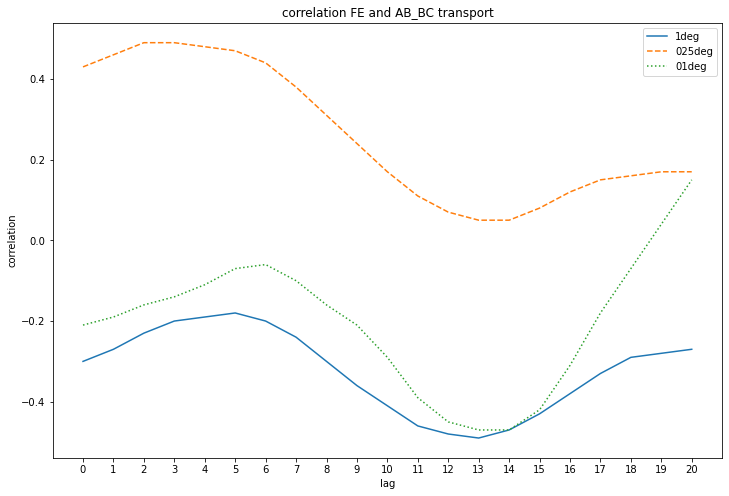

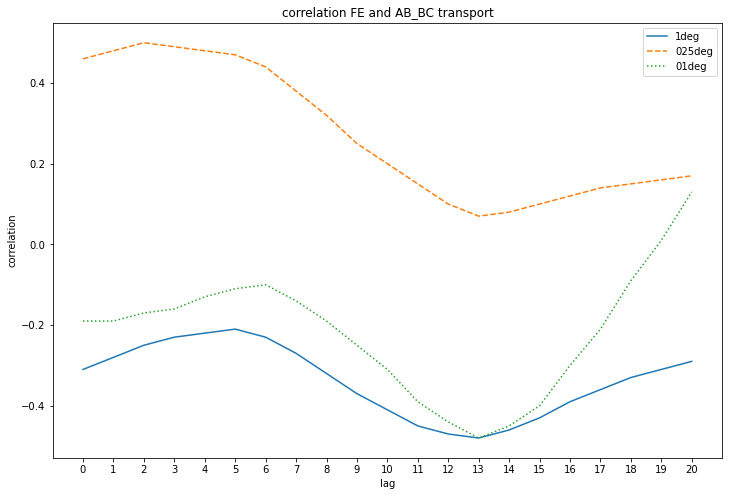

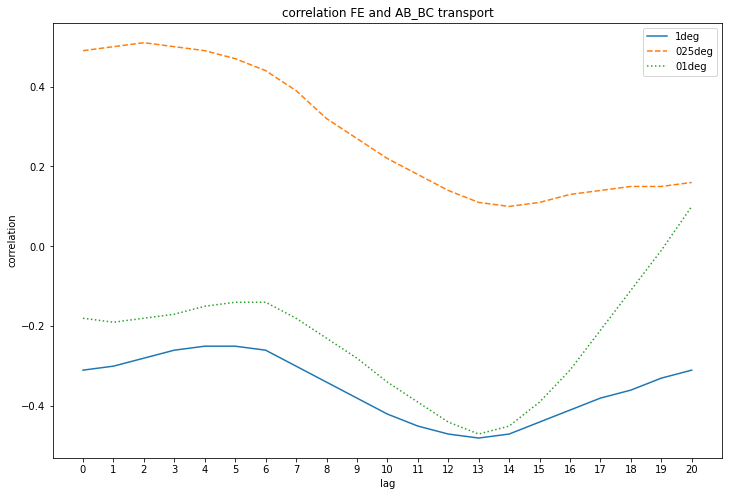

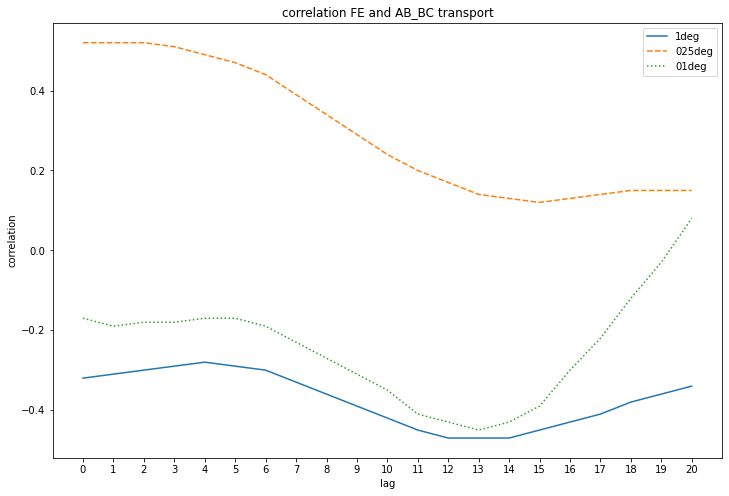

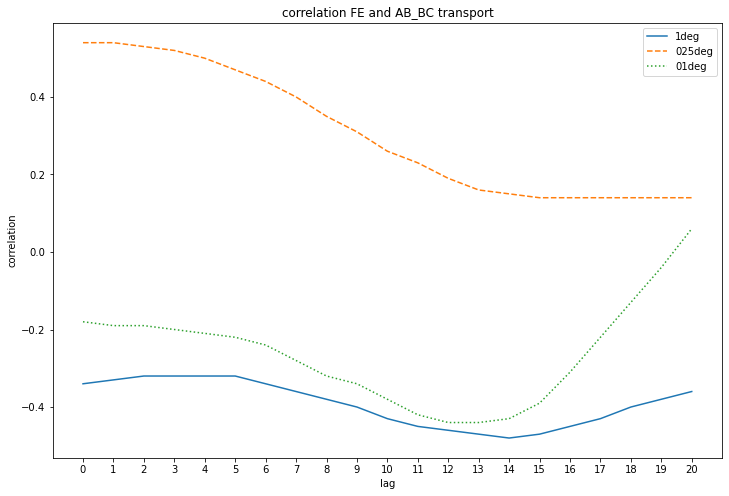

In [3]:
for j in range (2,11):
    
    x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
    dataset = pd.read_csv('6.2.1 correlation and lags/correlation and lags(' + str(j) + ').csv')
    
    y1 = dataset.iloc[:, 1].values
    y2 = dataset.iloc[:, 2].values
    y3 = dataset.iloc[:, 3].values

    plt.figure(figsize(12,8))

    plt.plot(x,y1, label = '1deg')
    plt.plot(x,y2, label = '025deg',linestyle = '--')
    plt.plot(x,y3, label = '01deg',linestyle = ':')
    
    # plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
    plt.legend(loc=1)                        
    plt.xticks(x)
    plt.title('correlation FE and AB_BC transport')
    plt.xlabel('lag')
    plt.ylabel('correlation')

    savefigure('correlation and lag of ' + str(j) + '-year averaged') 